In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
plt.rcParams['figure.figsize']=[10,4]

# To aavoid any Warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
mytable= pd.read_csv('mytable_dataset_challenge_8.csv')

In [3]:
mytable['margin_rate'] = (mytable['margin']/mytable['revenue'])*100

In [17]:
mytable

,customer_id,number_of_transactions,units,revenue,margin,margin_rate
0,101,1,2,38.0,20.0,52.631579
1,102,1,3,33.0,18.0,54.545455
2,103,1,5,45.0,26.0,57.777778
3,104,1,3,24.0,11.0,45.833333
4,105,1,3,42.0,22.0,52.380952
...,...,...,...,...,...,...
95,196,4,16,288.0,152.0,52.777778
96,197,4,16,176.0,90.0,51.136364
97,198,4,8,112.0,43.0,38.392857
98,199,4,8,120.0,60.0,50.000000


In [5]:
mytable.mean()

customer_id               150.500000
number_of_transactions      2.050000
units                       7.040000
revenue                    99.080000
margin                     49.240000
margin_rate                50.234853
dtype: float64

In [41]:
mytable.groupby('customer_id').mean()

,number_of_transactions,units,revenue,margin,margin_rate
customer_id,,,,,
101,1.0,2.0,38.0,20.0,52.631579
102,1.0,3.0,33.0,18.0,54.545455
103,1.0,5.0,45.0,26.0,57.777778
104,1.0,3.0,24.0,11.0,45.833333
105,1.0,3.0,42.0,22.0,52.380952
...,...,...,...,...,...
196,4.0,16.0,288.0,152.0,52.777778
197,4.0,16.0,176.0,90.0,51.136364
198,4.0,8.0,112.0,43.0,38.392857


In [6]:
mytable.median()

customer_id               150.500000
number_of_transactions      2.000000
units                       6.000000
revenue                    72.000000
margin                     36.500000
margin_rate                50.223214
dtype: float64

In [19]:
mytable.groupby('customer_id').median()

,number_of_transactions,units,revenue,margin,margin_rate
customer_id,,,,,
101,1.0,2.0,38.0,20.0,52.631579
102,1.0,3.0,33.0,18.0,54.545455
103,1.0,5.0,45.0,26.0,57.777778
104,1.0,3.0,24.0,11.0,45.833333
105,1.0,3.0,42.0,22.0,52.380952
...,...,...,...,...,...
196,4.0,16.0,288.0,152.0,52.777778
197,4.0,16.0,176.0,90.0,51.136364
198,4.0,8.0,112.0,43.0,38.392857


In [32]:
piviot= mytable.groupby('number_of_transactions')[['number_of_transactions', 'units', 'revenue']].sum()
piviot.rename(columns={'number_of_transactions': 'Sum_number_of_transactions'},inplace=True)
piviot.reset_index(inplace=True)

In [34]:
piviot['avg_item_value']= piviot['revenue']/ piviot['units']
piviot['avg_order_value']=piviot['revenue']/ piviot['Sum_number_of_transactions']

In [36]:
piviot[['number_of_transactions','avg_item_value','avg_order_value']]

,number_of_transactions,avg_item_value,avg_order_value
0,1,13.562044,47.641026
1,2,13.428571,45.575758
2,3,14.390244,49.166667
3,4,14.872727,51.125000


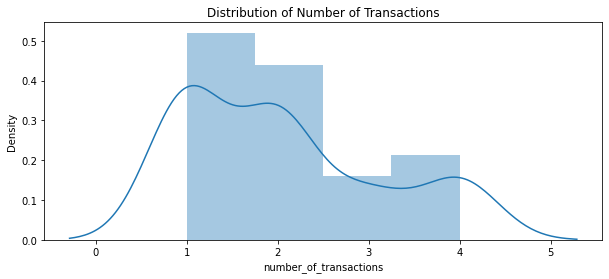

In [7]:
sns.distplot(mytable.number_of_transactions)
plt.title('Distribution of Number of Transactions')
plt.show()

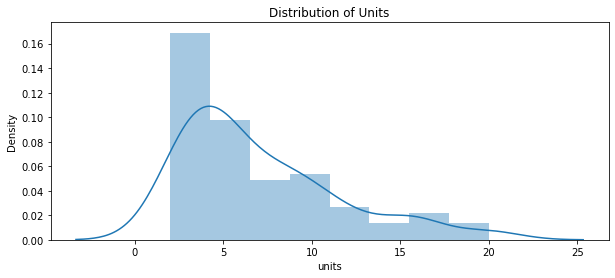

In [8]:
sns.distplot(mytable.units)
plt.title('Distribution of Units')
plt.show()
plt.show()

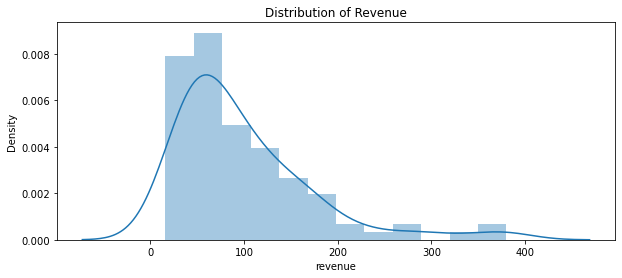

In [9]:
sns.distplot(mytable.revenue)
plt.title('Distribution of Revenue')
plt.show()

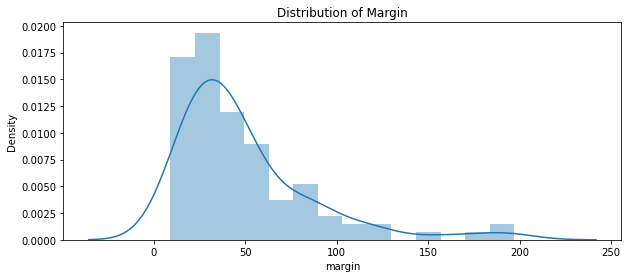

In [10]:
sns.distplot(mytable.margin)
plt.title('Distribution of Margin')
plt.show()
plt.show()

In [11]:
mytable.columns

Index(['customer_id', 'number_of_transactions', 'units', 'revenue', 'margin',
       'margin_rate'],
      dtype='object')

In [12]:
mytable[['number_of_transactions', 'units', 'revenue', 'margin','margin_rate']].describe()

,number_of_transactions,units,revenue,margin,margin_rate
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2.050000,7.040000,99.080000,49.240000,50.234853
std,1.076611,4.467435,74.352108,37.438467,5.611453
min,1.000000,2.000000,16.000000,9.000000,38.392857
25%,1.000000,4.000000,48.000000,25.000000,46.395503
50%,2.000000,6.000000,72.000000,36.500000,50.223214
75%,3.000000,9.250000,122.500000,57.000000,55.000000
max,4.000000,20.000000,380.000000,197.000000,60.294118


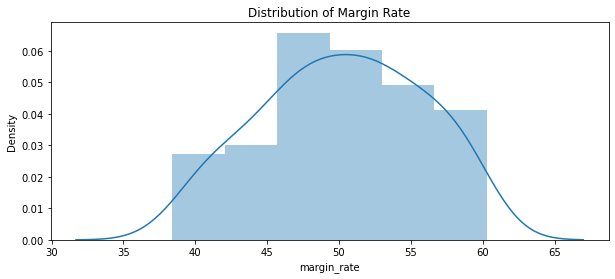

In [13]:
sns.distplot(mytable.margin_rate)
plt.title('Distribution of Margin Rate')
plt.show()
plt.show()

In [14]:
mytable.columns

Index(['customer_id', 'number_of_transactions', 'units', 'revenue', 'margin',
       'margin_rate'],
      dtype='object')

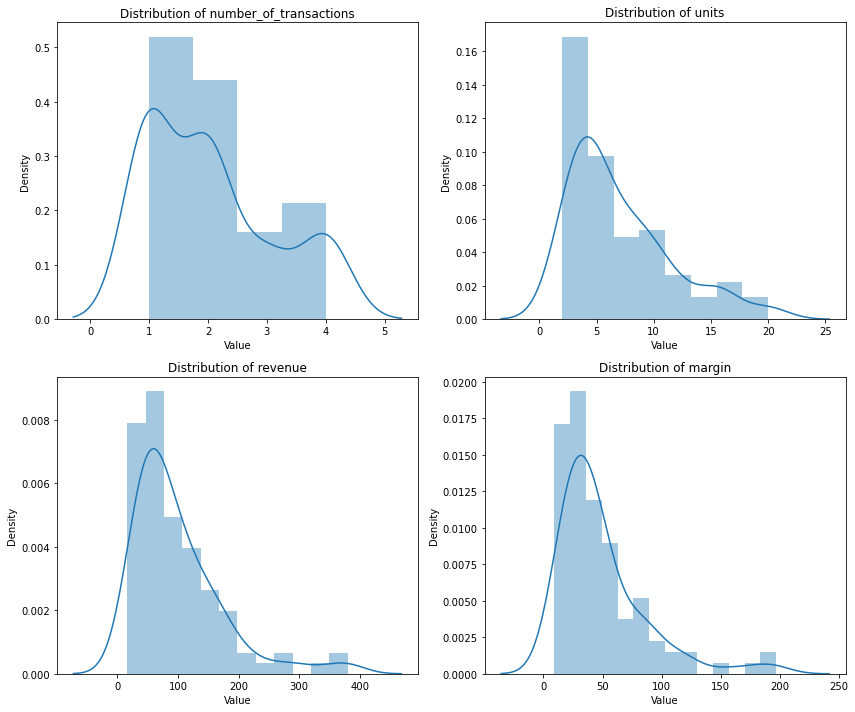

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
df=mytable[['number_of_transactions', 'units', 'revenue', 'margin']]
# Flatten axes for easy iteration
axes = axes.flatten()

# Iterate over columns and plot each column's distribution
for i, column in enumerate(df.columns):
    sns.distplot(df[column], ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()